In [37]:
import pickle
import numpy as np
import functions as f
import os
import matplotlib.pyplot as plt
import pandas as pd
from cycler import cycler
import scipy.io.wavfile as wav


f.remove_short_recordings_start('converted_memo')
f.remove_created_audio_files_start('pitch')
f.remove_created_audio_files_start('white_noise')
f.remove_created_audio_files_start('clipping')


plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.prop_cycle'] = cycler(color = ['#7180AC', '#6A605C', 'b', 'y'])
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.facecolor'] = 'black'

Removed files in converted_memo/10_sec
Removed files in converted_memo/5_sec
Removed files in converted_memo/20_sec
Removed files in converted_memo/1_sec
Removed files in converted_memo/3_sec
Removed files in converted_memo/0.5_sec
Removed files in converted_memo/2_sec
----------------------
deleted files in directory pitch/goosebumps
deleted files in directory pitch/popstar
deleted files in directory pitch/tears
----------------------
----------------------
deleted files in directory white_noise/goosebumps
deleted files in directory white_noise/popstar
deleted files in directory white_noise/tears
----------------------
----------------------
deleted files in directory clipping/goosebumps
deleted files in directory clipping/popstar
deleted files in directory clipping/tears
----------------------


First load the hashes of our database of original songs, previously saved in 2 .pickle files created with fpal_test.ipynb

In [2]:
database = pickle.load(open('database_test.pickle', 'rb'))
song_name_index = pickle.load(open("song_test_index.pickle", "rb"))

# White Noise

We will see how the algorithm performs in terms of overall score for single registrations for diffent levels of white noise

### Goosebumps - White Noise

In [3]:
f.create_white_noise_files('converted_memo/original/Travis Scott, HVME - Goosebumps (Remix - Official Audio).wav', 'white_noise/goosebumps')
list_of_right_songs, scores = f.scores_for_different_noise('white_noise/goosebumps/', database, song_name_index)

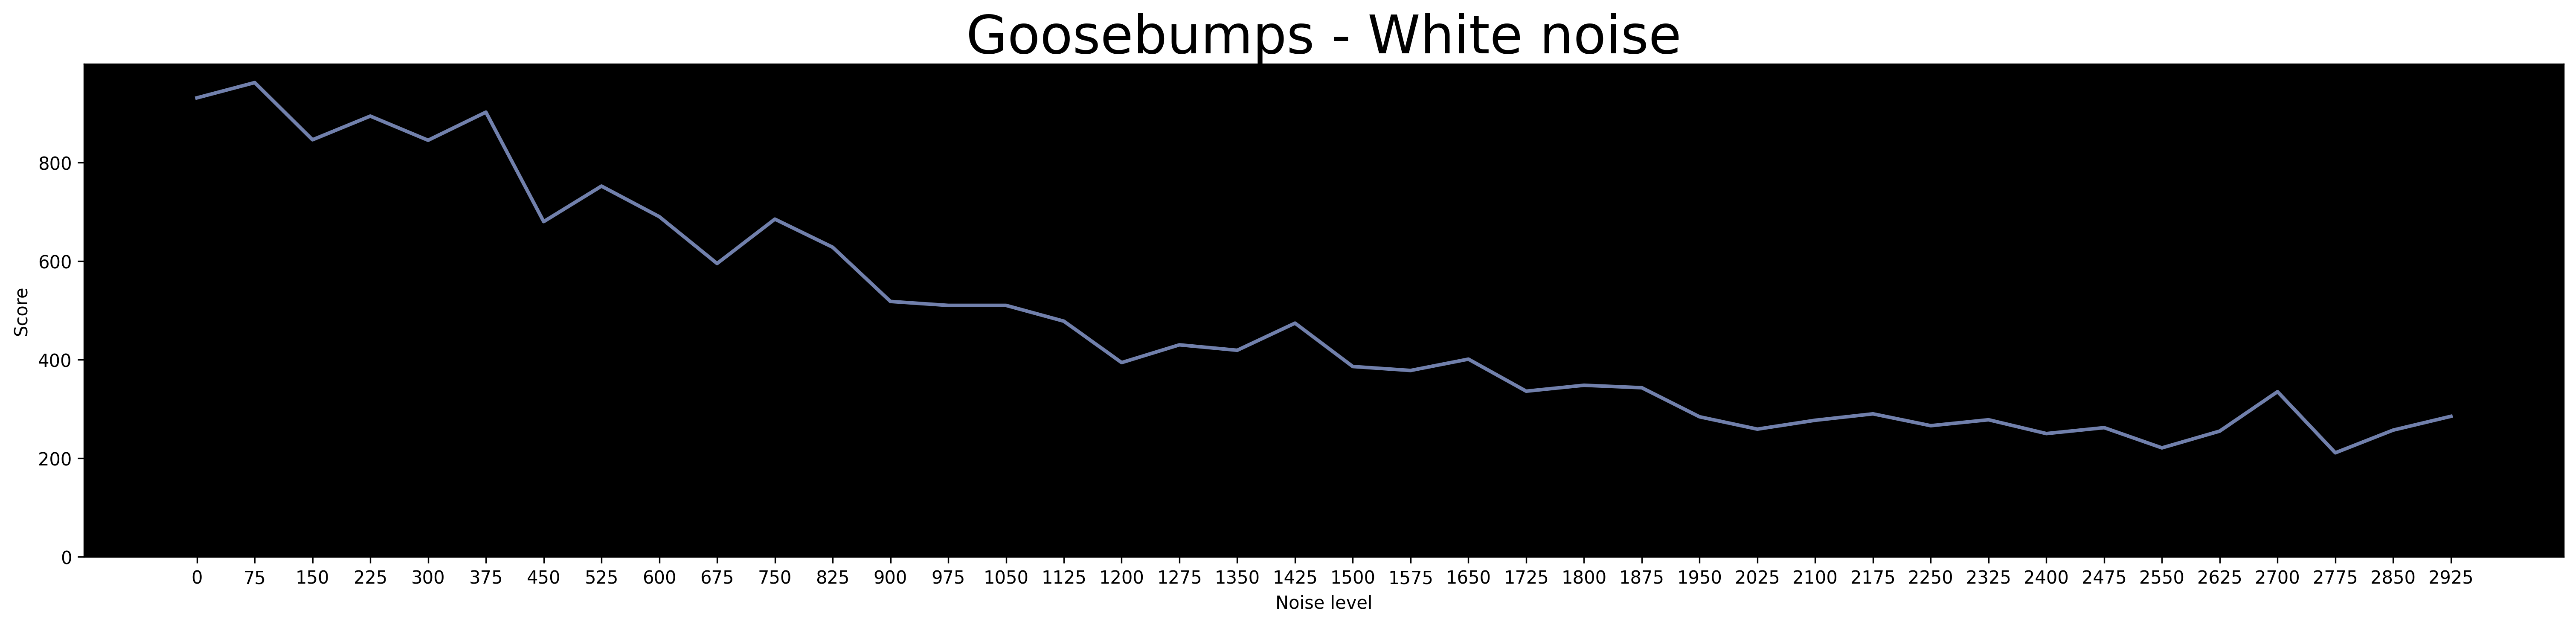

In [4]:
plt.figure(figsize = (25, 5))
plt.title('Goosebumps - White noise', fontsize = 30)
plt.plot(os.listdir('white_noise/goosebumps/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 3000, 75)], ticks = os.listdir('white_noise/goosebumps/'))
plt.xlabel('Noise level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

Did the algorithm get the right song at every noise level?

In [5]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['White noise level', 'Guessed song'])
df['White noise level'] = df['White noise level'].apply(lambda x: x.replace('white_noise_', '').strip('.wav'))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('White noise level', inplace = True)
df

,Guessed song
White noise level,
0,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
75,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
150,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
225,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
300,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
375,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
450,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
525,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
600,"Travis Scott, HVME - Goosebumps (Remix - Offic..."


### Save Your Tears - White Noise

In [7]:
f.create_white_noise_files('converted_memo/original/The Weeknd - Save Your Tears (Official Audio).wav', 'white_noise/tears')
list_of_right_songs, scores = f.scores_for_different_noise('white_noise/tears/', database, song_name_index)

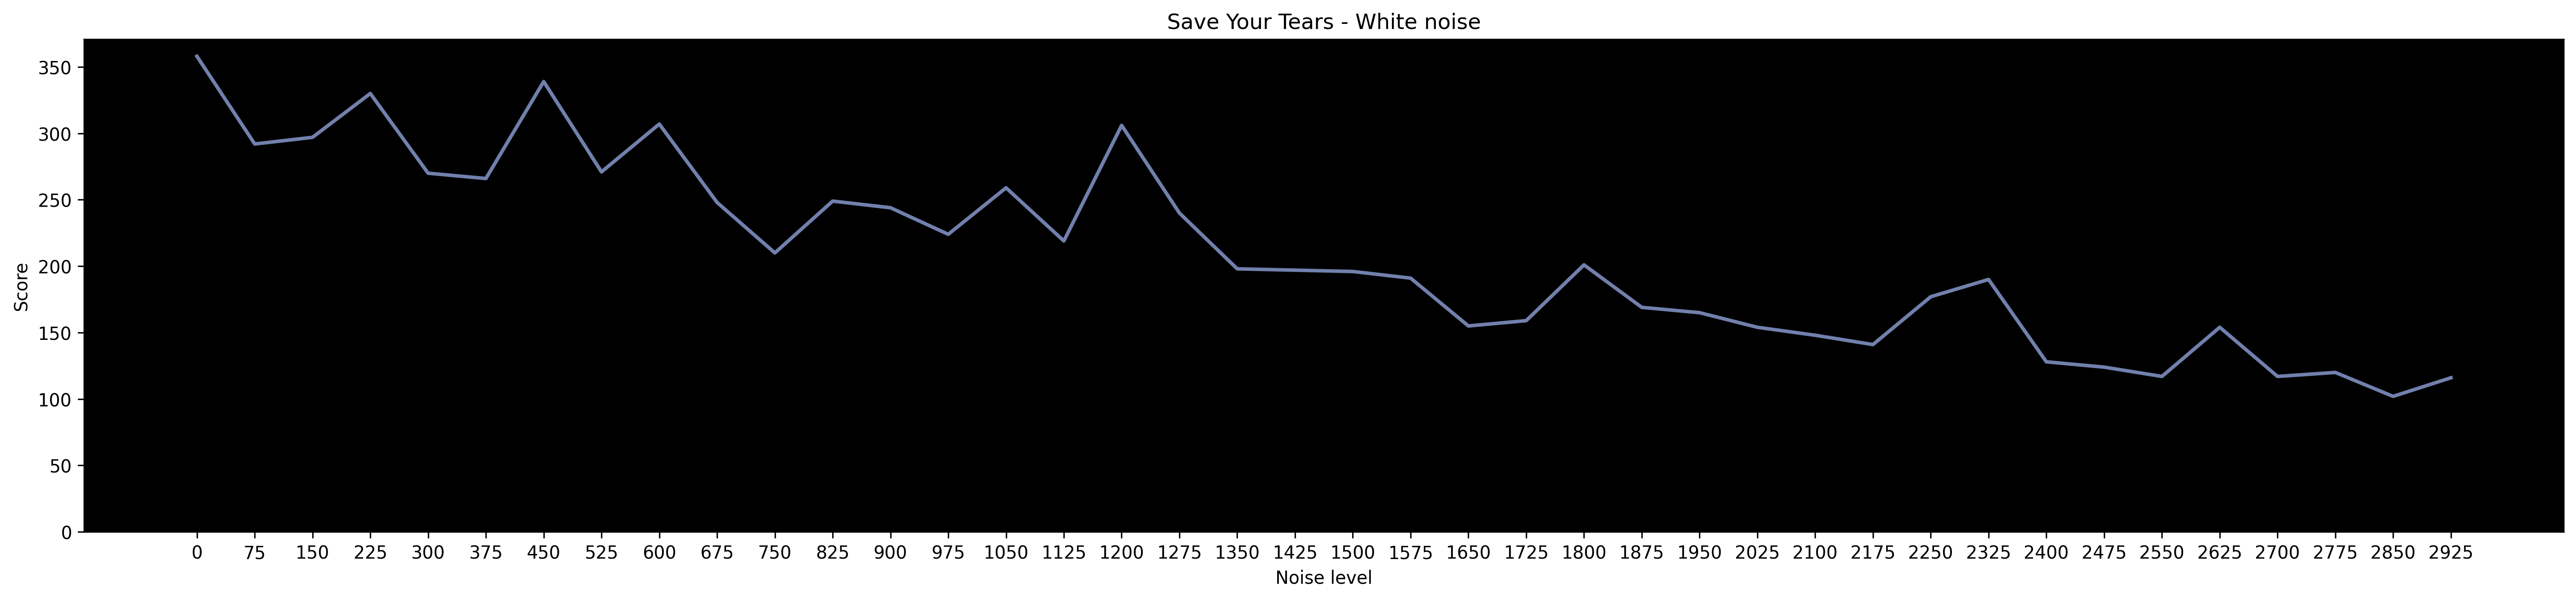

In [8]:
plt.figure(figsize = (25, 5))
plt.title('Save Your Tears - White noise')
plt.plot(os.listdir('white_noise/tears/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 3000, 75)], ticks = os.listdir('white_noise/tears/'))
plt.xlabel('Noise level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

Did the algorithm get the right song at every noise level?

In [9]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['White noise level', 'Guessed song'])
df['White noise level'] = df['White noise level'].apply(lambda x: x.replace('white_noise_', '').strip('.wav'))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('White noise level', inplace = True)
df

,Guessed song
White noise level,
0,The Weeknd - Save Your Tears (Official Audio)
75,The Weeknd - Save Your Tears (Official Audio)
150,The Weeknd - Save Your Tears (Official Audio)
225,The Weeknd - Save Your Tears (Official Audio)
300,The Weeknd - Save Your Tears (Official Audio)
375,The Weeknd - Save Your Tears (Official Audio)
450,The Weeknd - Save Your Tears (Official Audio)
525,The Weeknd - Save Your Tears (Official Audio)
600,The Weeknd - Save Your Tears (Official Audio)


### POPSTAR - White Noise

In [10]:
f.create_white_noise_files('converted_memo/original/DJ Khaled ft. Drake - POPSTAR (Official Audio).wav', 'white_noise/popstar')
list_of_right_songs, scores = f.scores_for_different_noise('white_noise/popstar/', database, song_name_index)

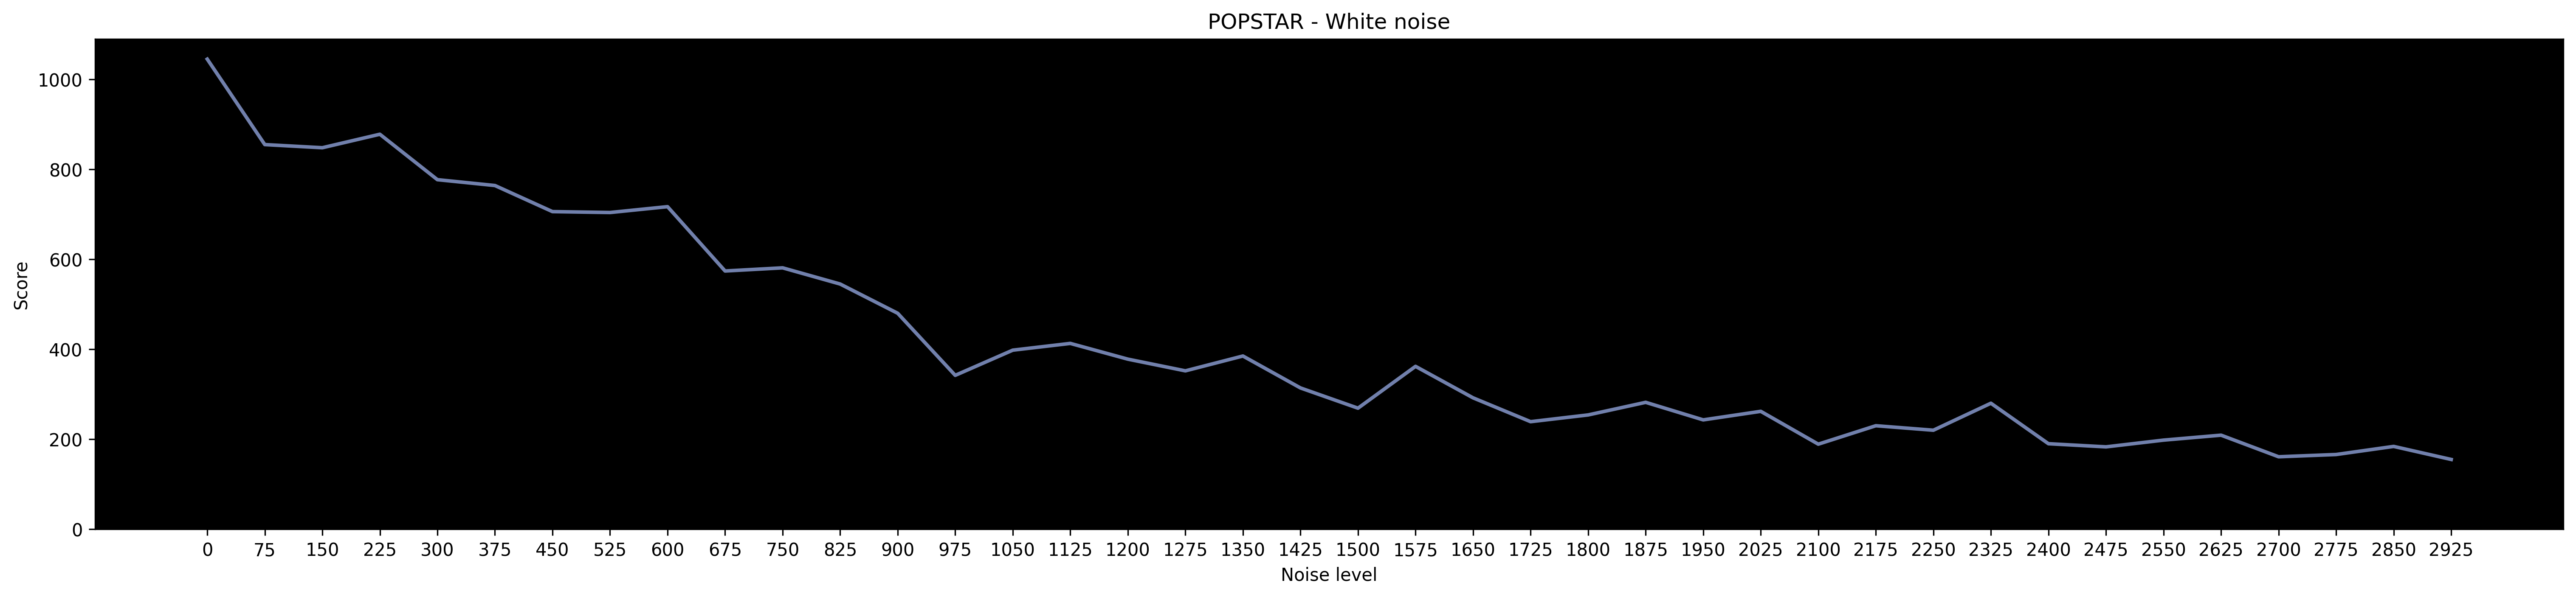

In [11]:
plt.figure(figsize = (25, 5))
plt.title('POPSTAR - White noise')
plt.plot(os.listdir('white_noise/popstar/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 3000, 75)], ticks = os.listdir('white_noise/popstar/'))
plt.xlabel('Noise level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

Did the algorithm get the right song at every noise level?

In [12]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['White noise level', 'Guessed song'])
df['White noise level'] = df['White noise level'].apply(lambda x: x.replace('white_noise_', '').strip('.wav'))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('White noise level', inplace = True)
df

,Guessed song
White noise level,
0,DJ Khaled ft. Drake - POPSTAR (Official Audio)
75,DJ Khaled ft. Drake - POPSTAR (Official Audio)
150,DJ Khaled ft. Drake - POPSTAR (Official Audio)
225,DJ Khaled ft. Drake - POPSTAR (Official Audio)
300,DJ Khaled ft. Drake - POPSTAR (Official Audio)
375,DJ Khaled ft. Drake - POPSTAR (Official Audio)
450,DJ Khaled ft. Drake - POPSTAR (Official Audio)
525,DJ Khaled ft. Drake - POPSTAR (Official Audio)
600,DJ Khaled ft. Drake - POPSTAR (Official Audio)


### Average right guessing white noise

For every white noise level (40), create a list of 68 registrations with that white noise level. Then, compute how much of the 68 registrations were guessed correctly; this takes a while since the algorithm has to process 40*68=2720 files

In [41]:
f.create_disturbed_registrations('white_noise', np.arange(0, 3000, 75), f.add_white_noise)
list_of_right_songs = [f.scores_different_lenght(f'white_noise/{x}', database, song_name_index) for x in np.arange(0, 3000, 75)]

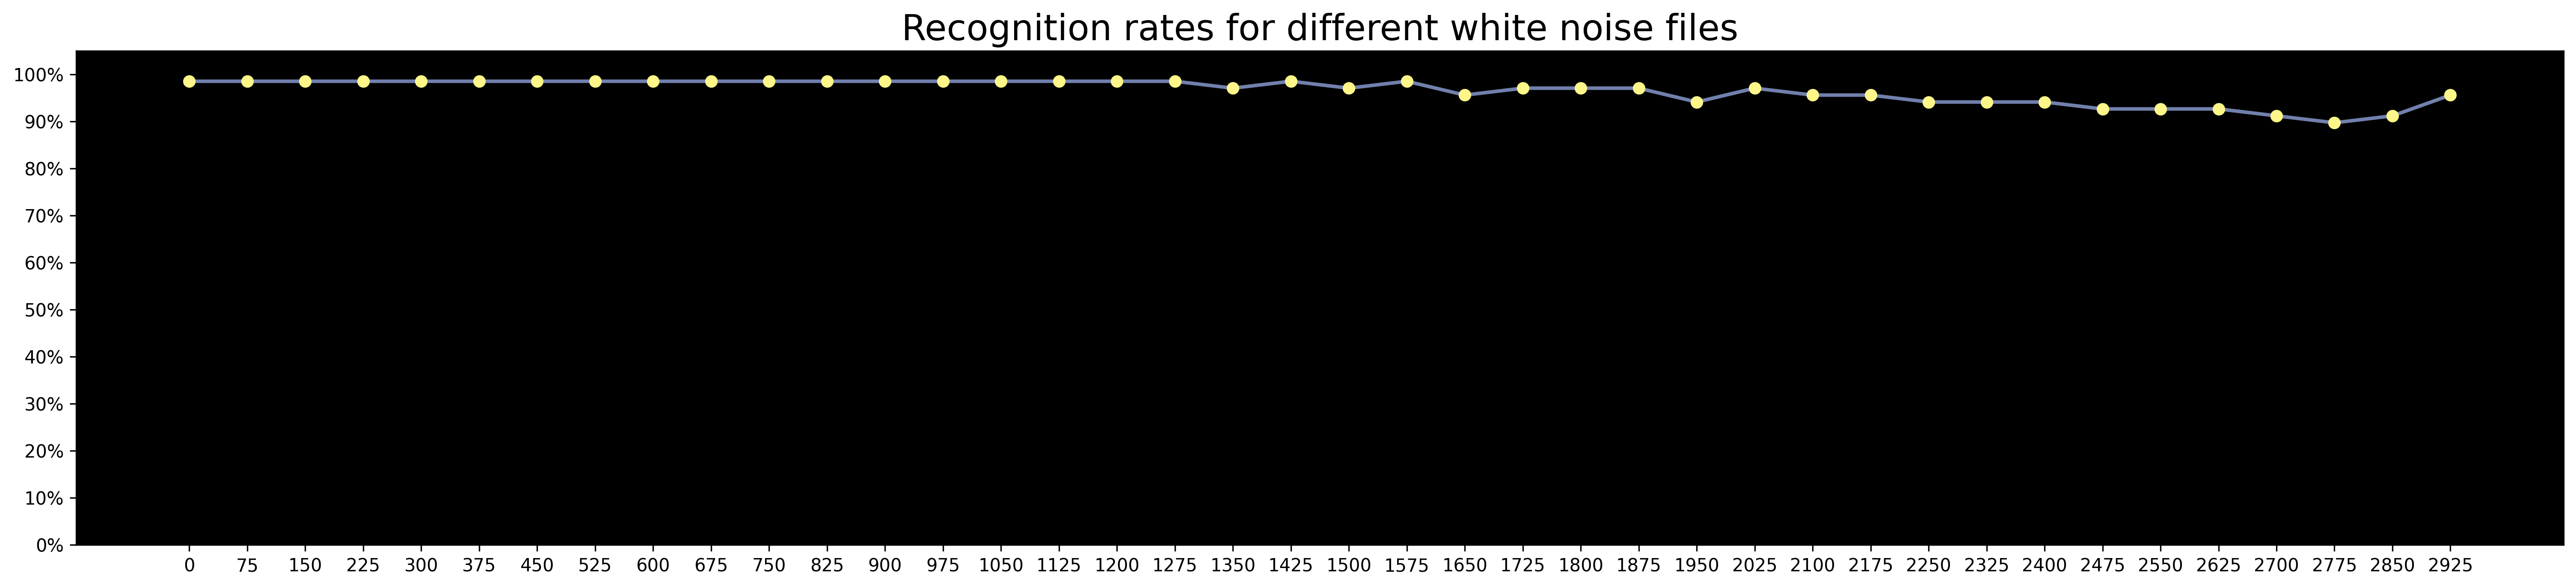

In [42]:
plt.figure(figsize = (25, 5))
plt.title('Recognition rates for different white noise files', fontsize = 20)
plt.plot(np.array(list_of_right_songs) / 68 * 100, zorder = 1)
plt.scatter(np.arange(0, len(list_of_right_songs), 1), np.array(list_of_right_songs) / 68 * 100, color = '#FFF689', zorder = 2)
plt.ylim(0, 105)
plt.yticks(labels = [str(x)+'%' for x in np.arange(0, 110, 10)], ticks = np.arange(0, 110, 10))
plt.xticks(labels = np.arange(0, 3000, 75), ticks = np.arange(0, len(list_of_right_songs), 1))
plt.show()

In [43]:
f.remove_directories('white_noise', np.arange(0, 3000, 75))

We can say that the algorithm is quite robust in terms of white noise. We see that the score for the guessed tracks in each of the 3 tested tracks gets lower as the noise level gets higher, but the guessed song is always correct. Some tracks may be more subsceptible to others to levels of white noise ("Save Your Tears" as an example, where at some noise levels the track guessed wasn't the right one) but overall the algorithm worked correctly. This is confirmed by the recognition rates that stay always above 90%, even for very high levels of white noise.

# Clipping
Clipping is a form of distortion that occurs when an amplifier is overdriven and attempts to deliver an output voltage beyond its maximum capability.

### Goosebumps - Clipping

In [13]:
f.create_clipped_files('converted_memo/original/Travis Scott, HVME - Goosebumps (Remix - Official Audio).wav', 'clipping/goosebumps')
list_of_right_songs, scores = f.scores_for_different_noise('clipping/goosebumps/', database, song_name_index)
score = scores[::-1]

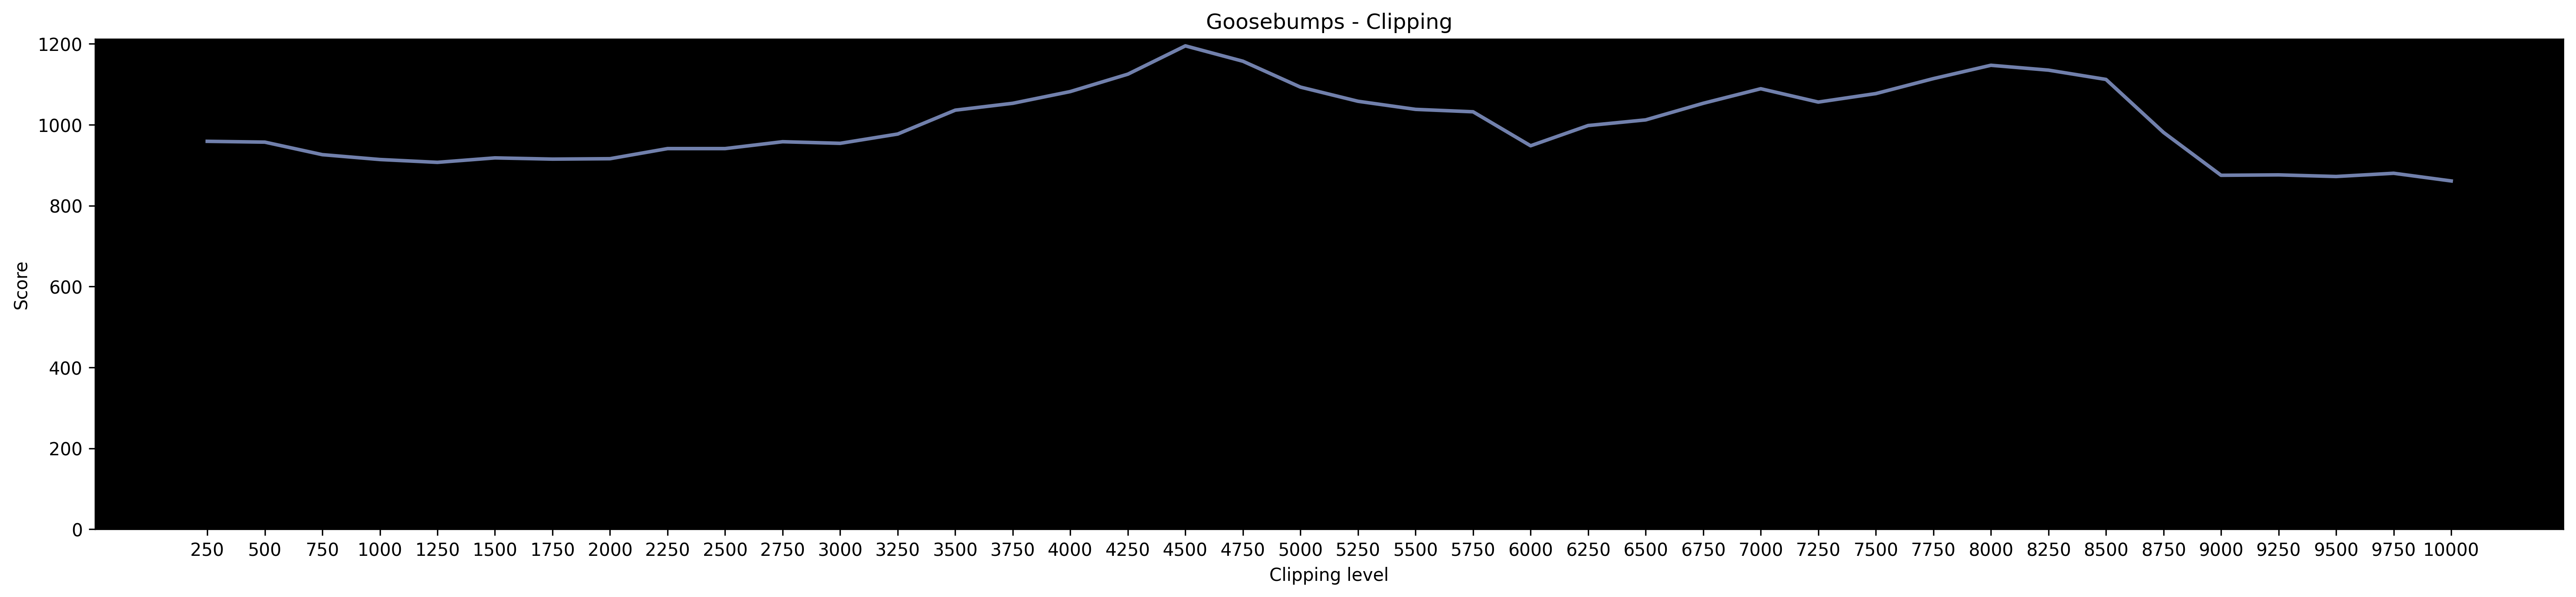

In [14]:
plt.figure(figsize = (25, 5))
plt.title('Goosebumps - Clipping')
plt.plot(os.listdir('clipping/goosebumps/'), score)
plt.xticks(labels = [x for x in np.arange(250, 10250, 250)], ticks = os.listdir('clipping/goosebumps/'))
plt.xlabel('Clipping level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [15]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['Clipping level', 'Guessed song'])
df['Clipping level'] = df['Clipping level'].apply(lambda x: x.replace('clipping_', '').strip('.wav'))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('Clipping level', inplace = True)
df

,Guessed song
Clipping level,
250,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
500,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
750,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
1000,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
1250,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
1500,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
1750,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
2000,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
2250,"Travis Scott, HVME - Goosebumps (Remix - Offic..."


### Save Your Tears - Clipping

In [16]:
f.create_clipped_files('converted_memo/original/The Weeknd - Save Your Tears (Official Audio).wav', 'clipping/tears')
list_of_right_songs, score = f.scores_for_different_noise('clipping/tears/', database, song_name_index)
scores = score[::-1]

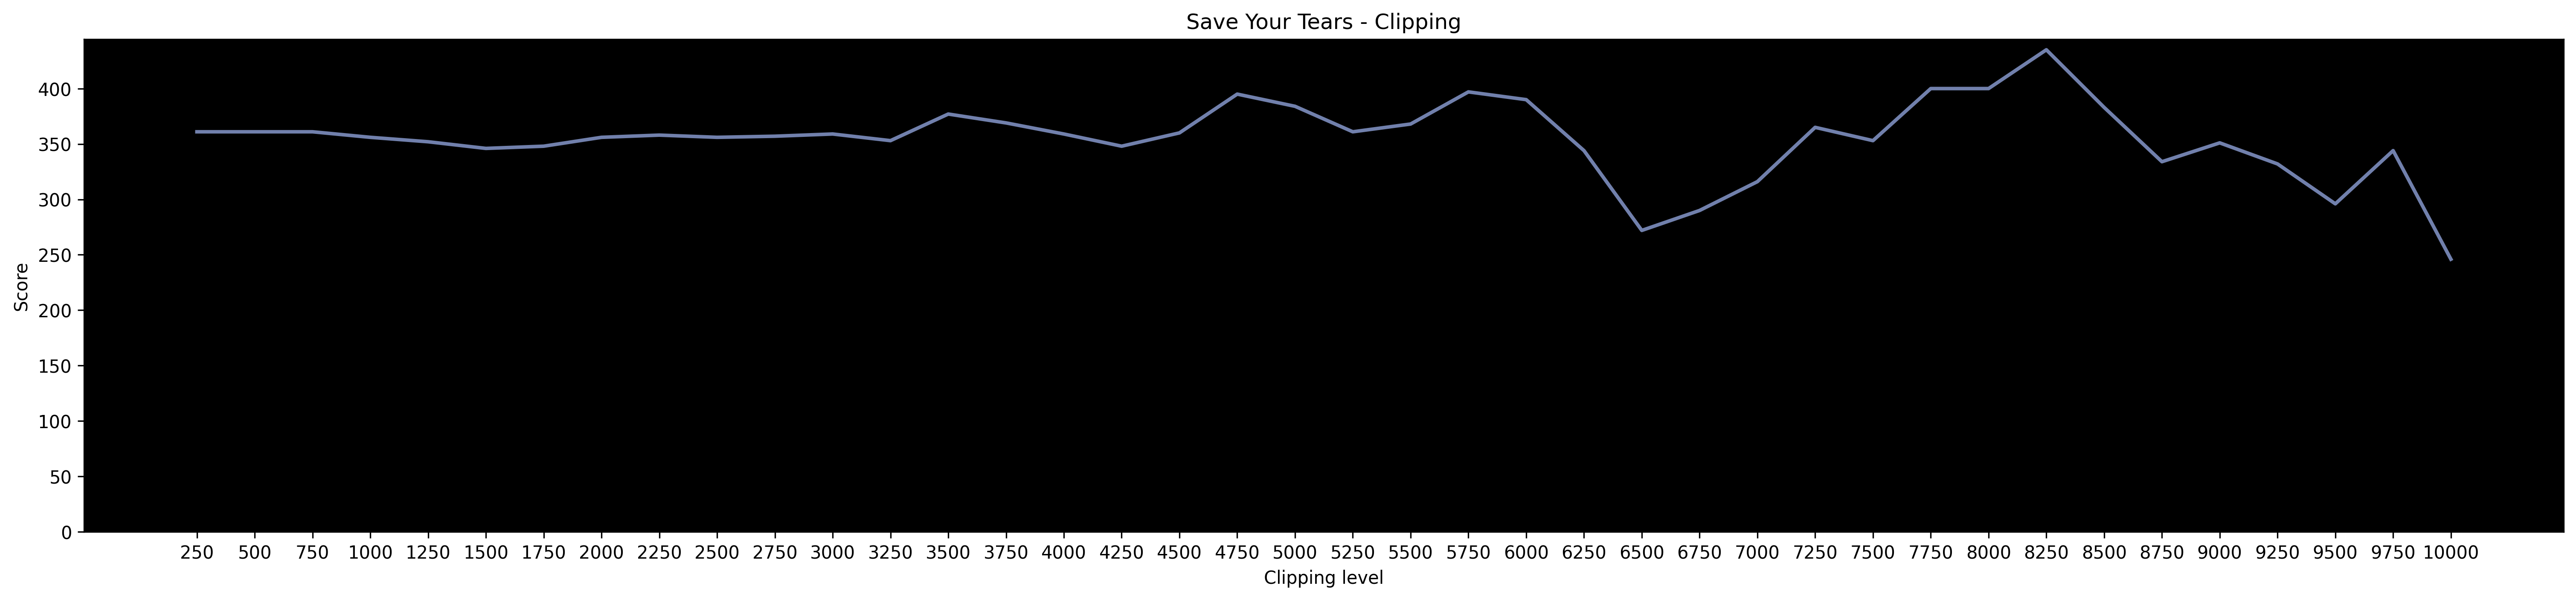

In [17]:
plt.figure(figsize = (25, 5))
plt.title('Save Your Tears - Clipping')
plt.plot(os.listdir('clipping/tears/'), scores)
plt.xticks(labels = [x for x in np.arange(250, 10250, 250)], ticks = os.listdir('clipping/tears/'))
plt.xlabel('Clipping level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [18]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['Clipping level', 'Guessed song'])
df['Clipping level'] = df['Clipping level'].apply(lambda x: x.replace('clipping_', '').strip('.wav'))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('Clipping level', inplace = True)
df

,Guessed song
Clipping level,
250,The Weeknd - Save Your Tears (Official Audio)
500,The Weeknd - Save Your Tears (Official Audio)
750,The Weeknd - Save Your Tears (Official Audio)
1000,The Weeknd - Save Your Tears (Official Audio)
1250,The Weeknd - Save Your Tears (Official Audio)
1500,The Weeknd - Save Your Tears (Official Audio)
1750,The Weeknd - Save Your Tears (Official Audio)
2000,The Weeknd - Save Your Tears (Official Audio)
2250,The Weeknd - Save Your Tears (Official Audio)


### POPSTAR - Clipping

In [19]:
f.create_clipped_files('converted_memo/original/DJ Khaled ft. Drake - POPSTAR (Official Audio).wav', 'clipping/popstar')
list_of_right_songs, score = f.scores_for_different_noise('clipping/popstar/', database, song_name_index)
scores = score[::-1]

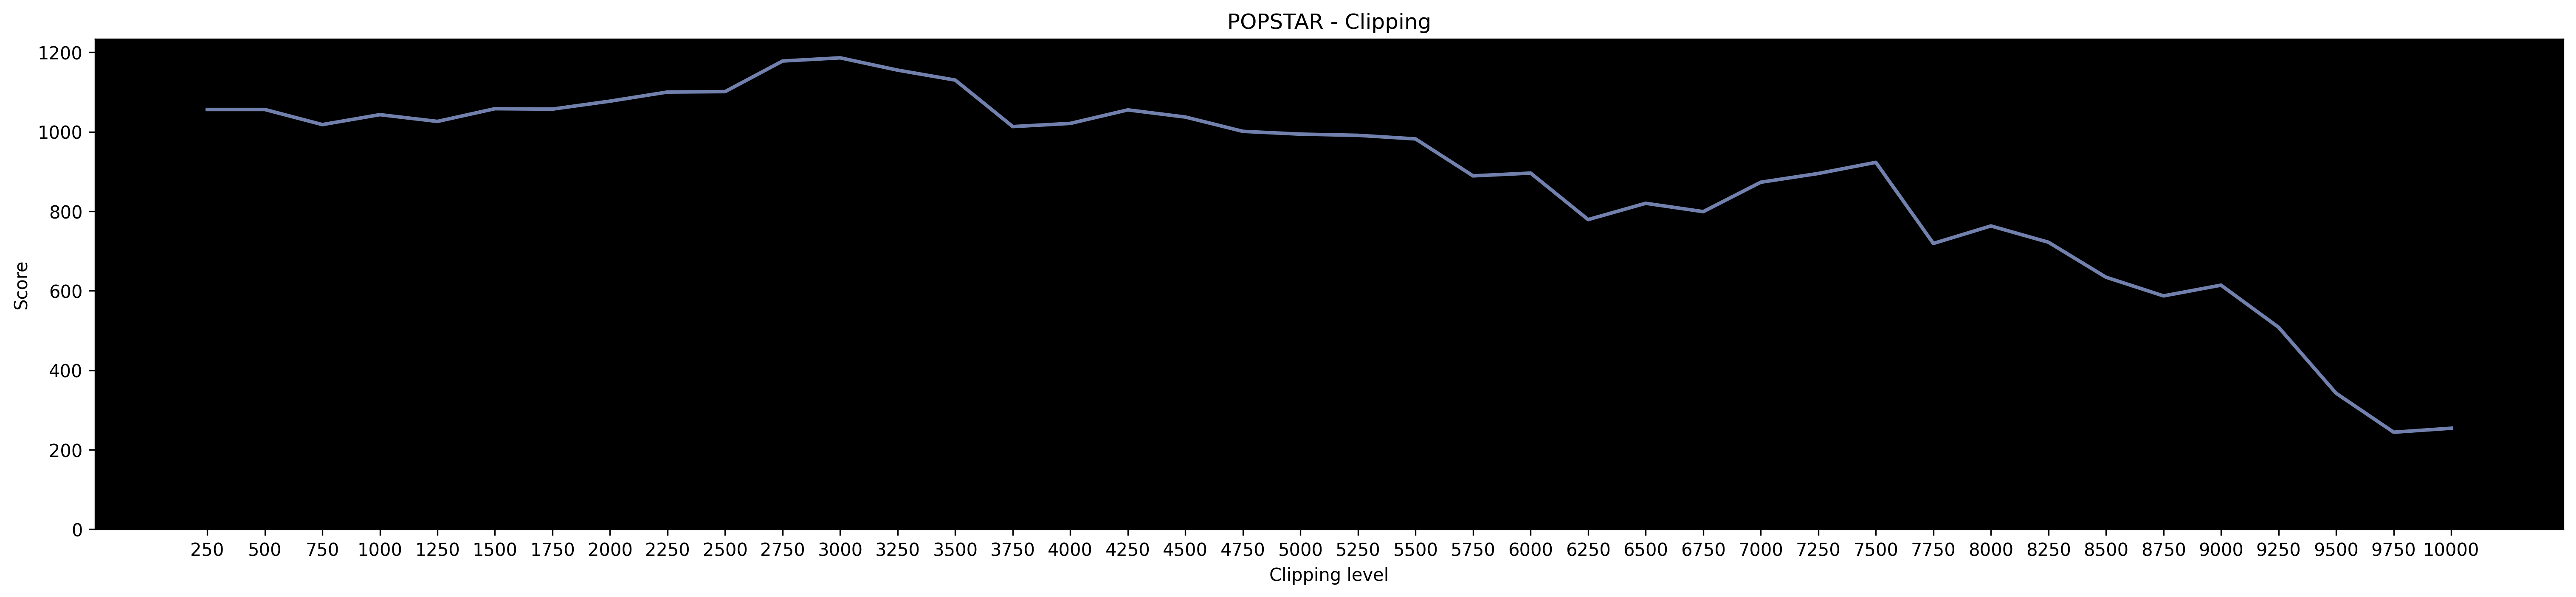

In [20]:
plt.figure(figsize = (25, 5))
plt.title('POPSTAR - Clipping')
plt.plot(os.listdir('clipping/popstar/'), scores)
plt.xticks(labels = [x for x in np.arange(250, 10250, 250)], ticks = os.listdir('clipping/popstar/'))
plt.xlabel('Clipping level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [21]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['Clipping level', 'Guessed song'])
df['Clipping level'] = df['Clipping level'].apply(lambda x: x.replace('clipping_', '').strip('.wav'))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('Clipping level', inplace = True)
df

,Guessed song
Clipping level,
250,Post Malone - Wow. (Official Music Video)
500,DJ Khaled ft. Drake - POPSTAR (Official Audio)
750,DJ Khaled ft. Drake - POPSTAR (Official Audio)
1000,DJ Khaled ft. Drake - POPSTAR (Official Audio)
1250,DJ Khaled ft. Drake - POPSTAR (Official Audio)
1500,DJ Khaled ft. Drake - POPSTAR (Official Audio)
1750,DJ Khaled ft. Drake - POPSTAR (Official Audio)
2000,DJ Khaled ft. Drake - POPSTAR (Official Audio)
2250,DJ Khaled ft. Drake - POPSTAR (Official Audio)


### Average right guessing clipping

For every clipping level (40), create a list of 68 registrations with that clipping level. Then, compute how much of the 68 registrations were guessed correctly; this takes a while since the algorithm has to process 40*68=2720 files

In [10]:
f.create_disturbed_registrations('clipping', np.arange(250, 10250, 250), f.add_clipping_distortion)
list_of_right_songs = [f.scores_different_lenght(f'clipping/{x}', database, song_name_index) for x in np.arange(250, 10250, 250)]
list_of_right_songs = list_of_right_songs[::-1]

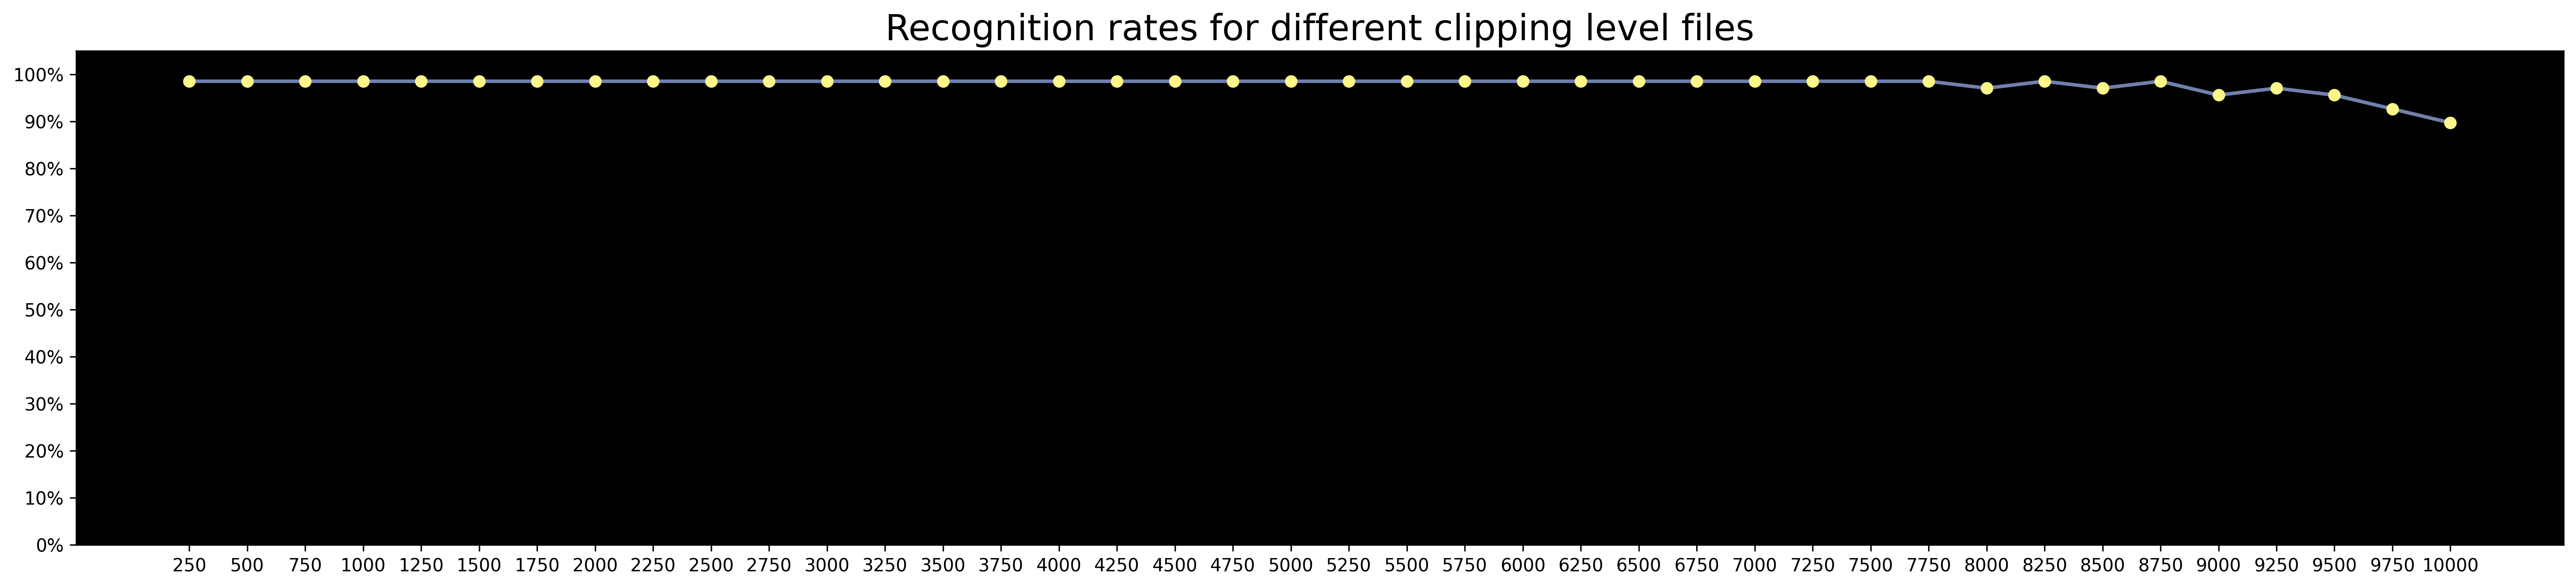

In [12]:
plt.figure(figsize = (25, 5))
plt.title('Recognition rates for different clipping level files', fontsize = 20)
plt.plot(np.array(list_of_right_songs) / 68 * 100, zorder = 1)
plt.scatter(np.arange(0, len(list_of_right_songs), 1), np.array(list_of_right_songs) / 68 * 100, color = '#FFF689', zorder = 2)
plt.ylim(0, 105)
plt.yticks(labels = [str(x)+'%' for x in np.arange(0, 110, 10)], ticks = np.arange(0, 110, 10))
plt.xticks(labels = np.arange(250, 10250, 250), ticks = np.arange(0, len(list_of_right_songs), 1))
plt.show()

In [15]:
f.remove_directories('clipping', np.arange(250, 10250, 250))

For clipping distortions, we see that in terms of score of the guessed song some tracks behave differently then others. In the 3 tested tracks, 2 of them have their score remain more or less the same for all levels of clipping, while the other had its score reduced as the clipping levels got higher. Besides this, the algorithm performed perfectly when it came to guessing the right songs, and this is confirmed by the recognition rates that almost always stay at 100%. We can conclude that the algorithm is highly robust to these type of distortions.

# Pitch shifting

### Goosebumps - Pitch shifting

In [22]:
f.create_pitched_files('converted_memo/original/Travis Scott, HVME - Goosebumps (Remix - Official Audio).wav', 'pitch/goosebumps')
list_of_right_songs, scores = f.scores_for_different_noise('pitch/goosebumps/', database, song_name_index)

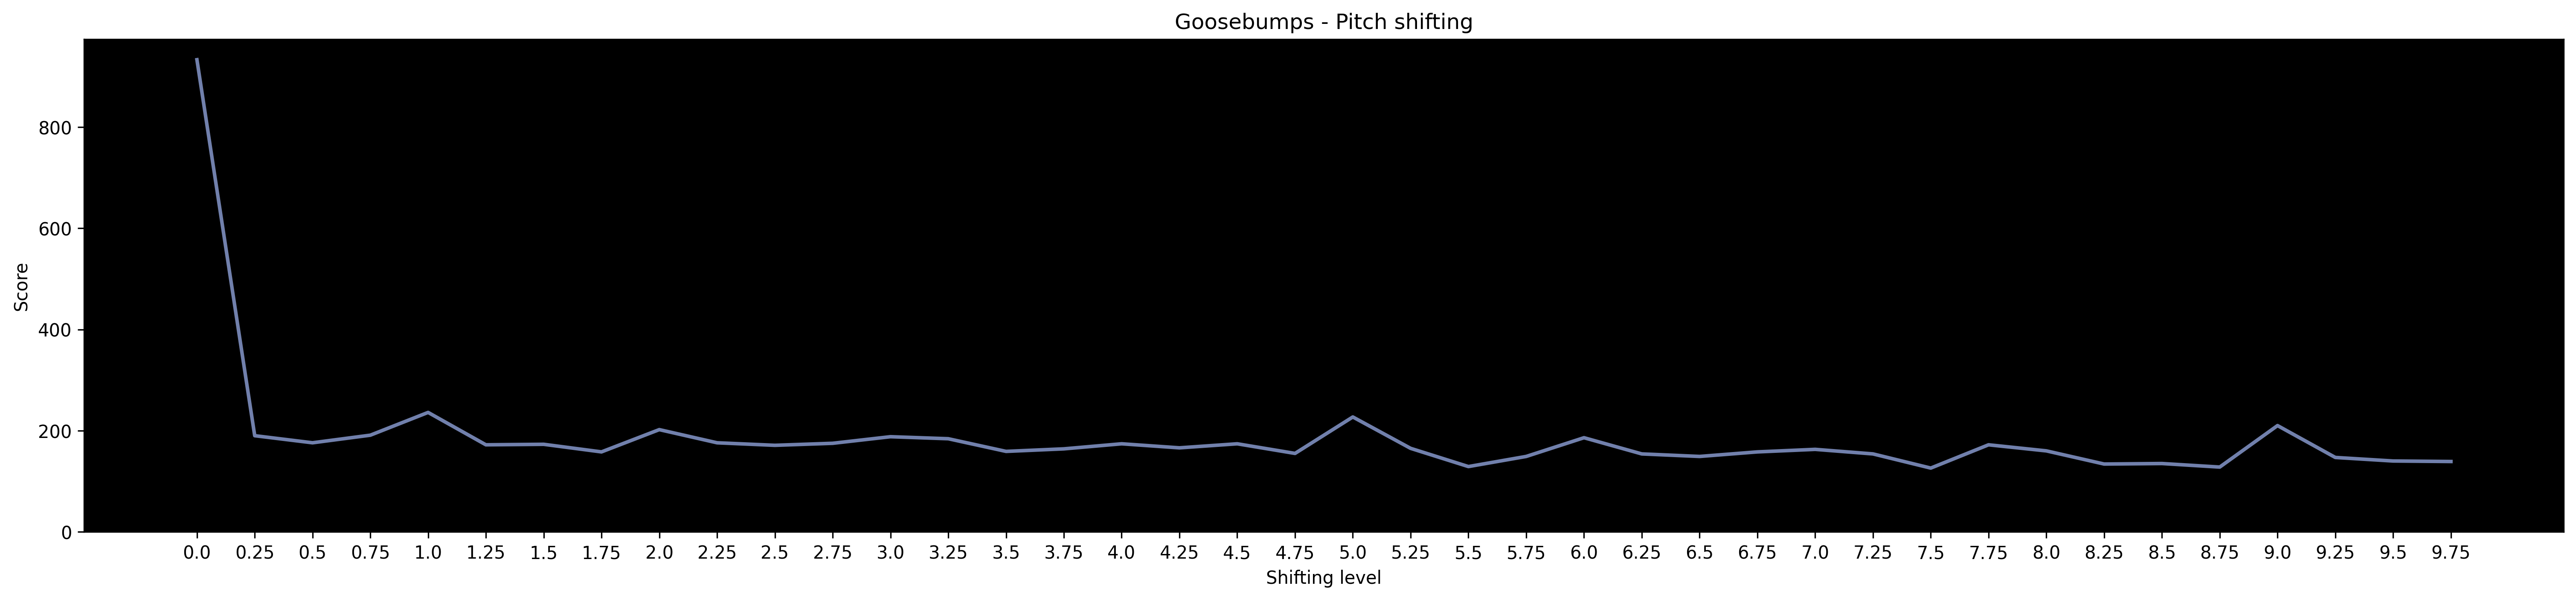

In [23]:
plt.figure(figsize = (25, 5))
plt.title('Goosebumps - Pitch shifting')
plt.plot(os.listdir('pitch/goosebumps/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 10, 0.25)], ticks = os.listdir('pitch/goosebumps/'))
plt.xlabel('Shifting level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [24]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['Pitch change level', 'Guessed song'])
df['Pitch change level'] = df['Pitch change level'].apply(lambda x: x.strip('.wav').replace('pitched_', ''))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('Pitch change level', inplace = True)
df

,Guessed song
Pitch change level,
0.0,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
0.25,Billie Eilish - What Was I Made For (Official ...
0.5,Billie Eilish - What Was I Made For (Official ...
0.75,Gotye - Somebody That I Used To Know (feat. Ki...
1.0,The Kid LAROI - WITHOUT YOU (Official Audio)
1.25,Beyoncé - TEXAS HOLD EM (Official Lyric Video)
1.5,BAD BUNNY x JHAY CORTEZ - DÁKITI (Video Oficial)
1.75,"The Kid LAROI, Justin Bieber - STAY (Official ..."
2.0,Miley Cyrus - Flowers (Official Video)


### Save Your Tears - Time stretching/Pitch shifting

In [25]:
f.create_pitched_files('converted_memo/original/The Weeknd - Save Your Tears (Official Audio).wav', 'pitch/tears')
list_of_right_songs, scores = f.scores_for_different_noise('pitch/tears/', database, song_name_index)

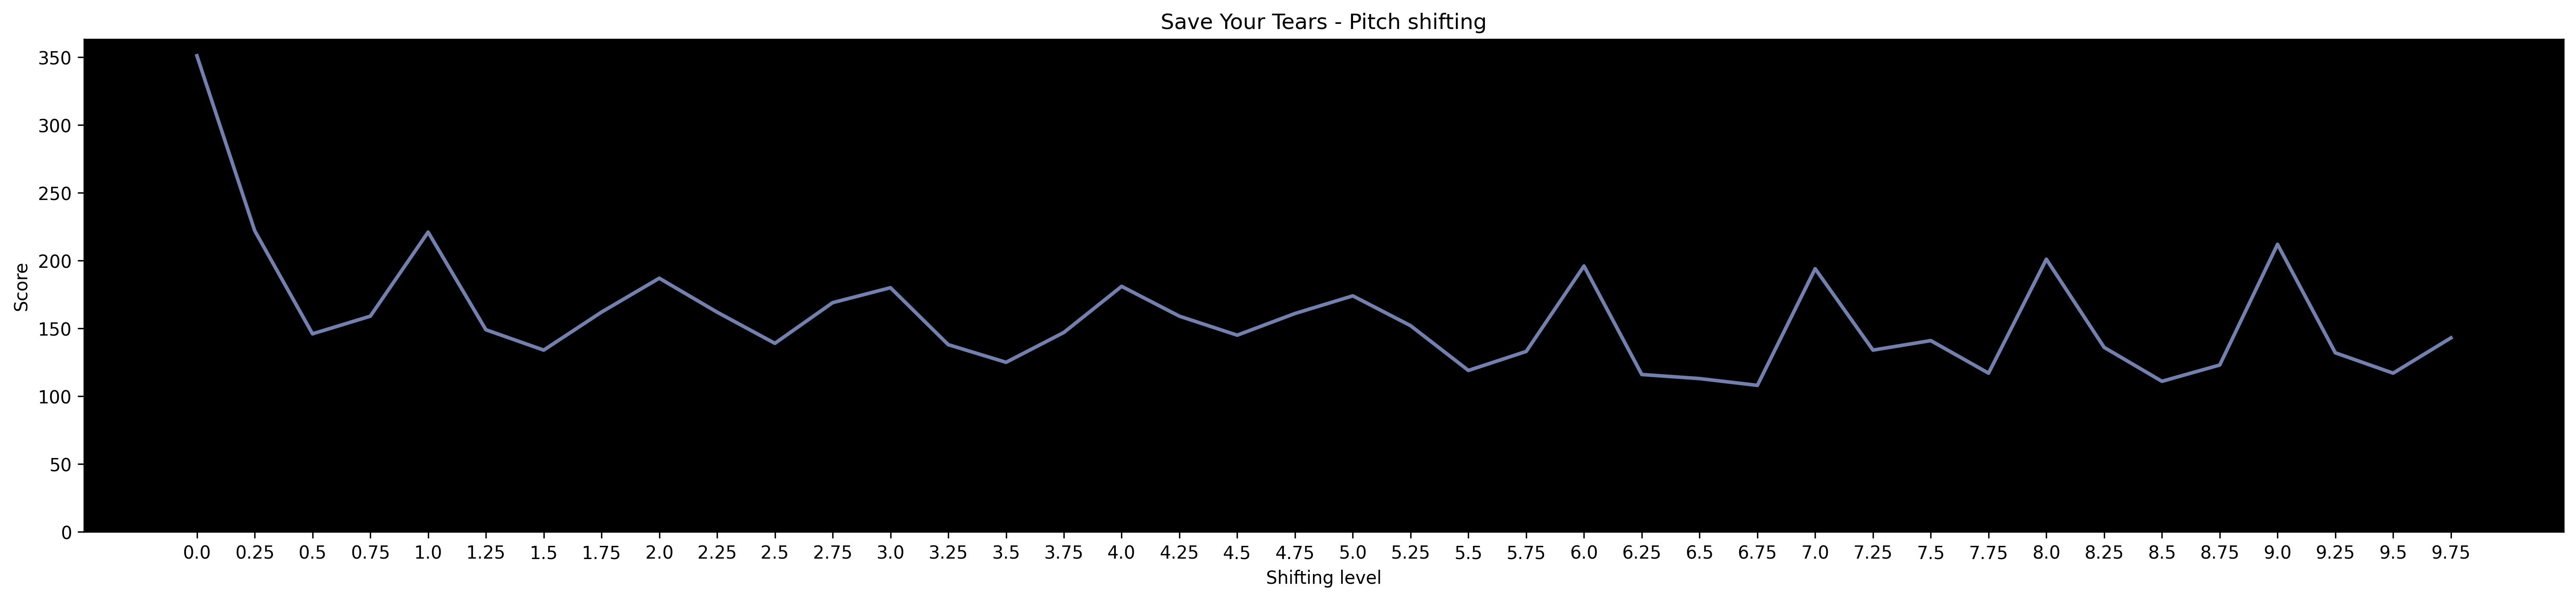

In [26]:
plt.figure(figsize = (25, 5))
plt.title('Save Your Tears - Pitch shifting')
plt.plot(os.listdir('pitch/tears/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 10, 0.25)], ticks = os.listdir('pitch/tears/'))
plt.xlabel('Shifting level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [27]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['Pitch change level', 'Guessed song'])
df['Pitch change level'] = df['Pitch change level'].apply(lambda x: x.strip('.wav').replace('pitched_', ''))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('Pitch change level', inplace = True)
df

,Guessed song
Pitch change level,
0.0,The Weeknd - Save Your Tears (Official Audio)
0.25,Billie Eilish - What Was I Made For (Official ...
0.5,Billie Eilish - What Was I Made For (Official ...
0.75,Artemas - i like the way you kiss me (lyric vi...
1.0,"The Kid LAROI, Justin Bieber - STAY (Official ..."
1.25,"The Kid LAROI, Justin Bieber - STAY (Official ..."
1.5,Post Malone - Wow. (Official Music Video)
1.75,Doja Cat - Paint The Town Red (Official Video)
2.0,Post Malone - Chemical (Official Music Video)


### POPSTAR - Time stretching/Pitch shifting

In [28]:
f.create_pitched_files('converted_memo/original/DJ Khaled ft. Drake - POPSTAR (Official Audio).wav', 'pitch/popstar')
list_of_right_songs, scores = f.scores_for_different_noise('pitch/popstar/', database, song_name_index)

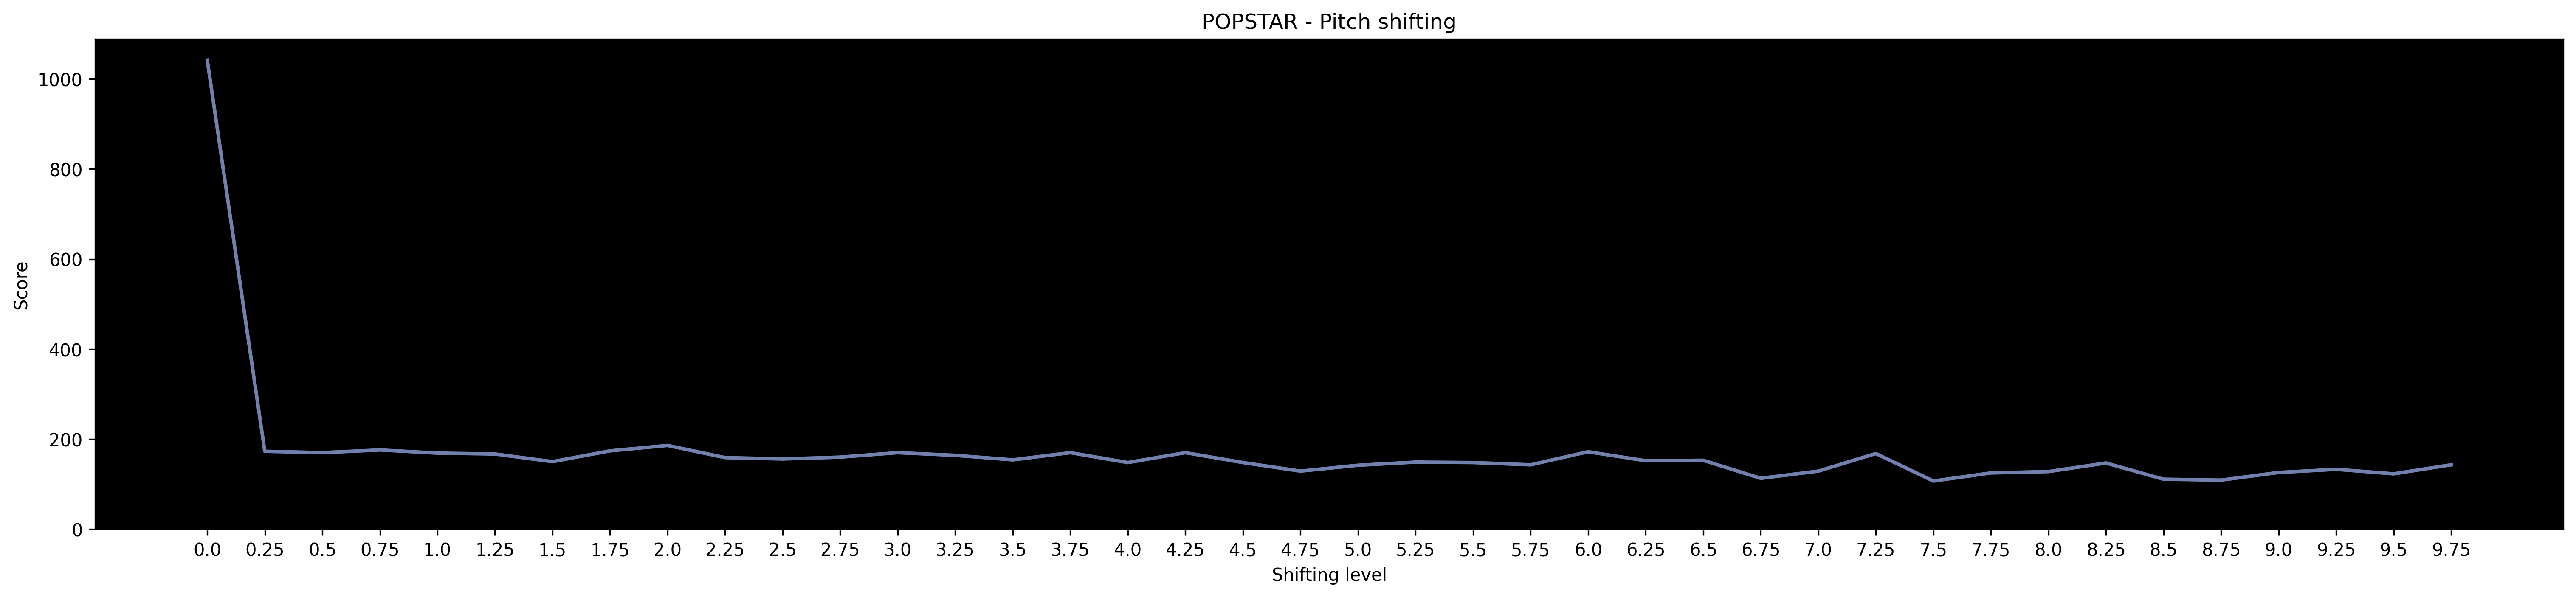

In [29]:
plt.figure(figsize = (25, 5))
plt.title('POPSTAR - Pitch shifting')
plt.plot(os.listdir('pitch/popstar/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 10, 0.25)], ticks = os.listdir('pitch/popstar/'))
plt.xlabel('Shifting level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [30]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['Pitch change level', 'Guessed song'])
df['Pitch change level'] = df['Pitch change level'].apply(lambda x: x.strip('.wav').replace('pitched_', ''))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('Pitch change level', inplace = True)
df

,Guessed song
Pitch change level,
0.0,DJ Khaled ft. Drake - POPSTAR (Official Audio)
0.25,Post Malone - Wow. (Official Music Video)
0.5,DJ Khaled ft. Drake - POPSTAR (Official Audio)
0.75,Justin Bieber - Anyone (Visualizer)
1.0,Maroon 5 - Memories (Official Video)
1.25,Arizona Zervas - ROXANNE (Official Video)
1.5,Artemas - i like the way you kiss me (lyric vi...
1.75,Gotye - Somebody That I Used To Know (feat. Ki...
2.0,Justin Bieber - Anyone (Visualizer)


### Average right guessing for pitch shifting

For every pitch shifting level (40), create a list of 68 registrations with that pitch shifting level. Then, compute how much of the 68 registrations were guessed correctly; this takes a while since the algorithm has to process 40*68=2720 files.

In [44]:
f.create_disturbed_registrations('pitch', np.arange(0, 10, 0.25), f.pitc_shift)
list_of_right_songs = [f.scores_different_lenght(f'pitch/{x}', database, song_name_index) for x in np.arange(0, 10, 0.25)]

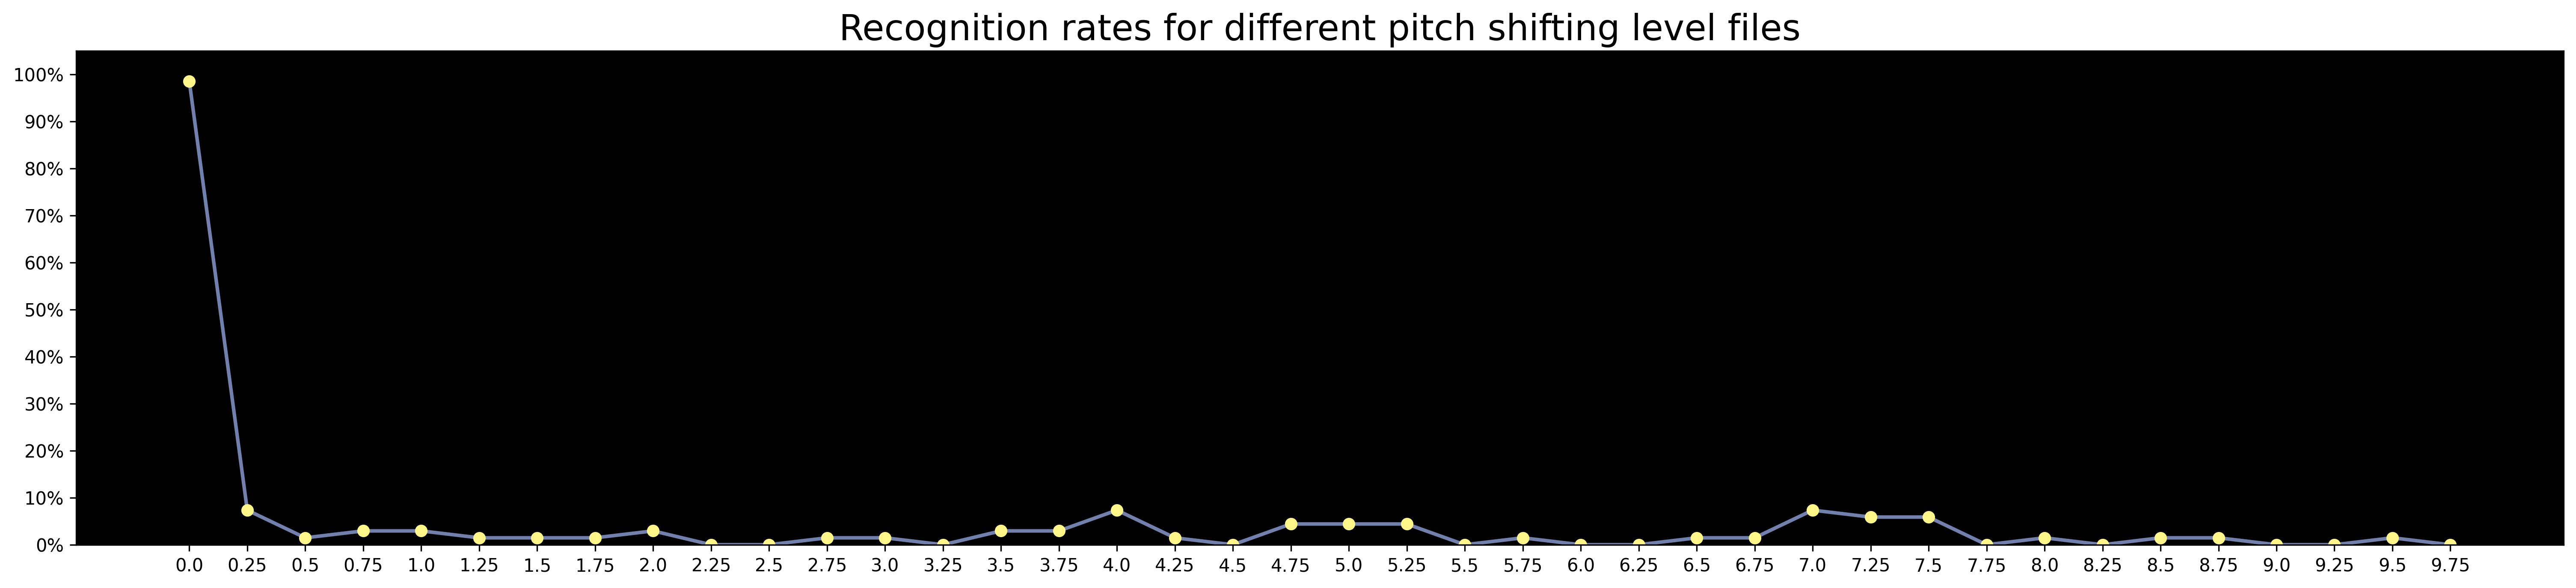

In [45]:
plt.figure(figsize = (25, 5))
plt.title('Recognition rates for different pitch shifting level files', fontsize = 20)
plt.plot(np.array(list_of_right_songs) / 68 * 100, zorder = 1)
plt.scatter(np.arange(0, len(list_of_right_songs), 1), np.array(list_of_right_songs) / 68 * 100, color = '#FFF689', zorder = 2)
plt.ylim(0, 105)
plt.yticks(labels = [str(x)+'%' for x in np.arange(0, 110, 10)], ticks = np.arange(0, 110, 10))
plt.xticks(labels = np.arange(0, 10, 0.25), ticks = np.arange(0, len(list_of_right_songs), 1))
plt.show()

In [46]:
f.remove_directories('pitch', np.arange(0, 10, 0.25))

Observe that for each of the 3 tested tracks the score of the guessed song drops almost at zero when applying some sort of pitch shifting, even at low levels. Observe also that the guessed song is almost never correct, and this is confirmed by the recognition rates that drop to 0% as soon as some pitch shifting is added. As stated before, this algorithm is based on the timing and the frequencies of the tracks, and when one of these two factors are altered (like in pitch shifting) it becomes useless. We can infer that we would encounter the same results even if we sped up or slowed down the tracks. 

# Shorter samples

In [38]:
f.shorten_file(20, 'converted_memo/original', 'converted_memo/20_sec')
f.shorten_file(10, 'converted_memo/original', 'converted_memo/10_sec')
f.shorten_file(5, 'converted_memo/original', 'converted_memo/5_sec')
f.shorten_file(3, 'converted_memo/original', 'converted_memo/3_sec')
f.shorten_file(2, 'converted_memo/original', 'converted_memo/2_sec')
f.shorten_file(1, 'converted_memo/original', 'converted_memo/1_sec')
f.shorten_file(0.5, 'converted_memo/original', 'converted_memo/0.5_sec')
list_of_scores = [f.scores_different_lenght('converted_memo/0.5_sec', database, song_name_index), f.scores_different_lenght('converted_memo/1_sec', database, song_name_index), f.scores_different_lenght('converted_memo/2_sec', database, song_name_index), f.scores_different_lenght('converted_memo/3_sec', database, song_name_index), f.scores_different_lenght('converted_memo/5_sec', database, song_name_index), f.scores_different_lenght('converted_memo/10_sec', database, song_name_index), f.scores_different_lenght('converted_memo/20_sec', database, song_name_index)]

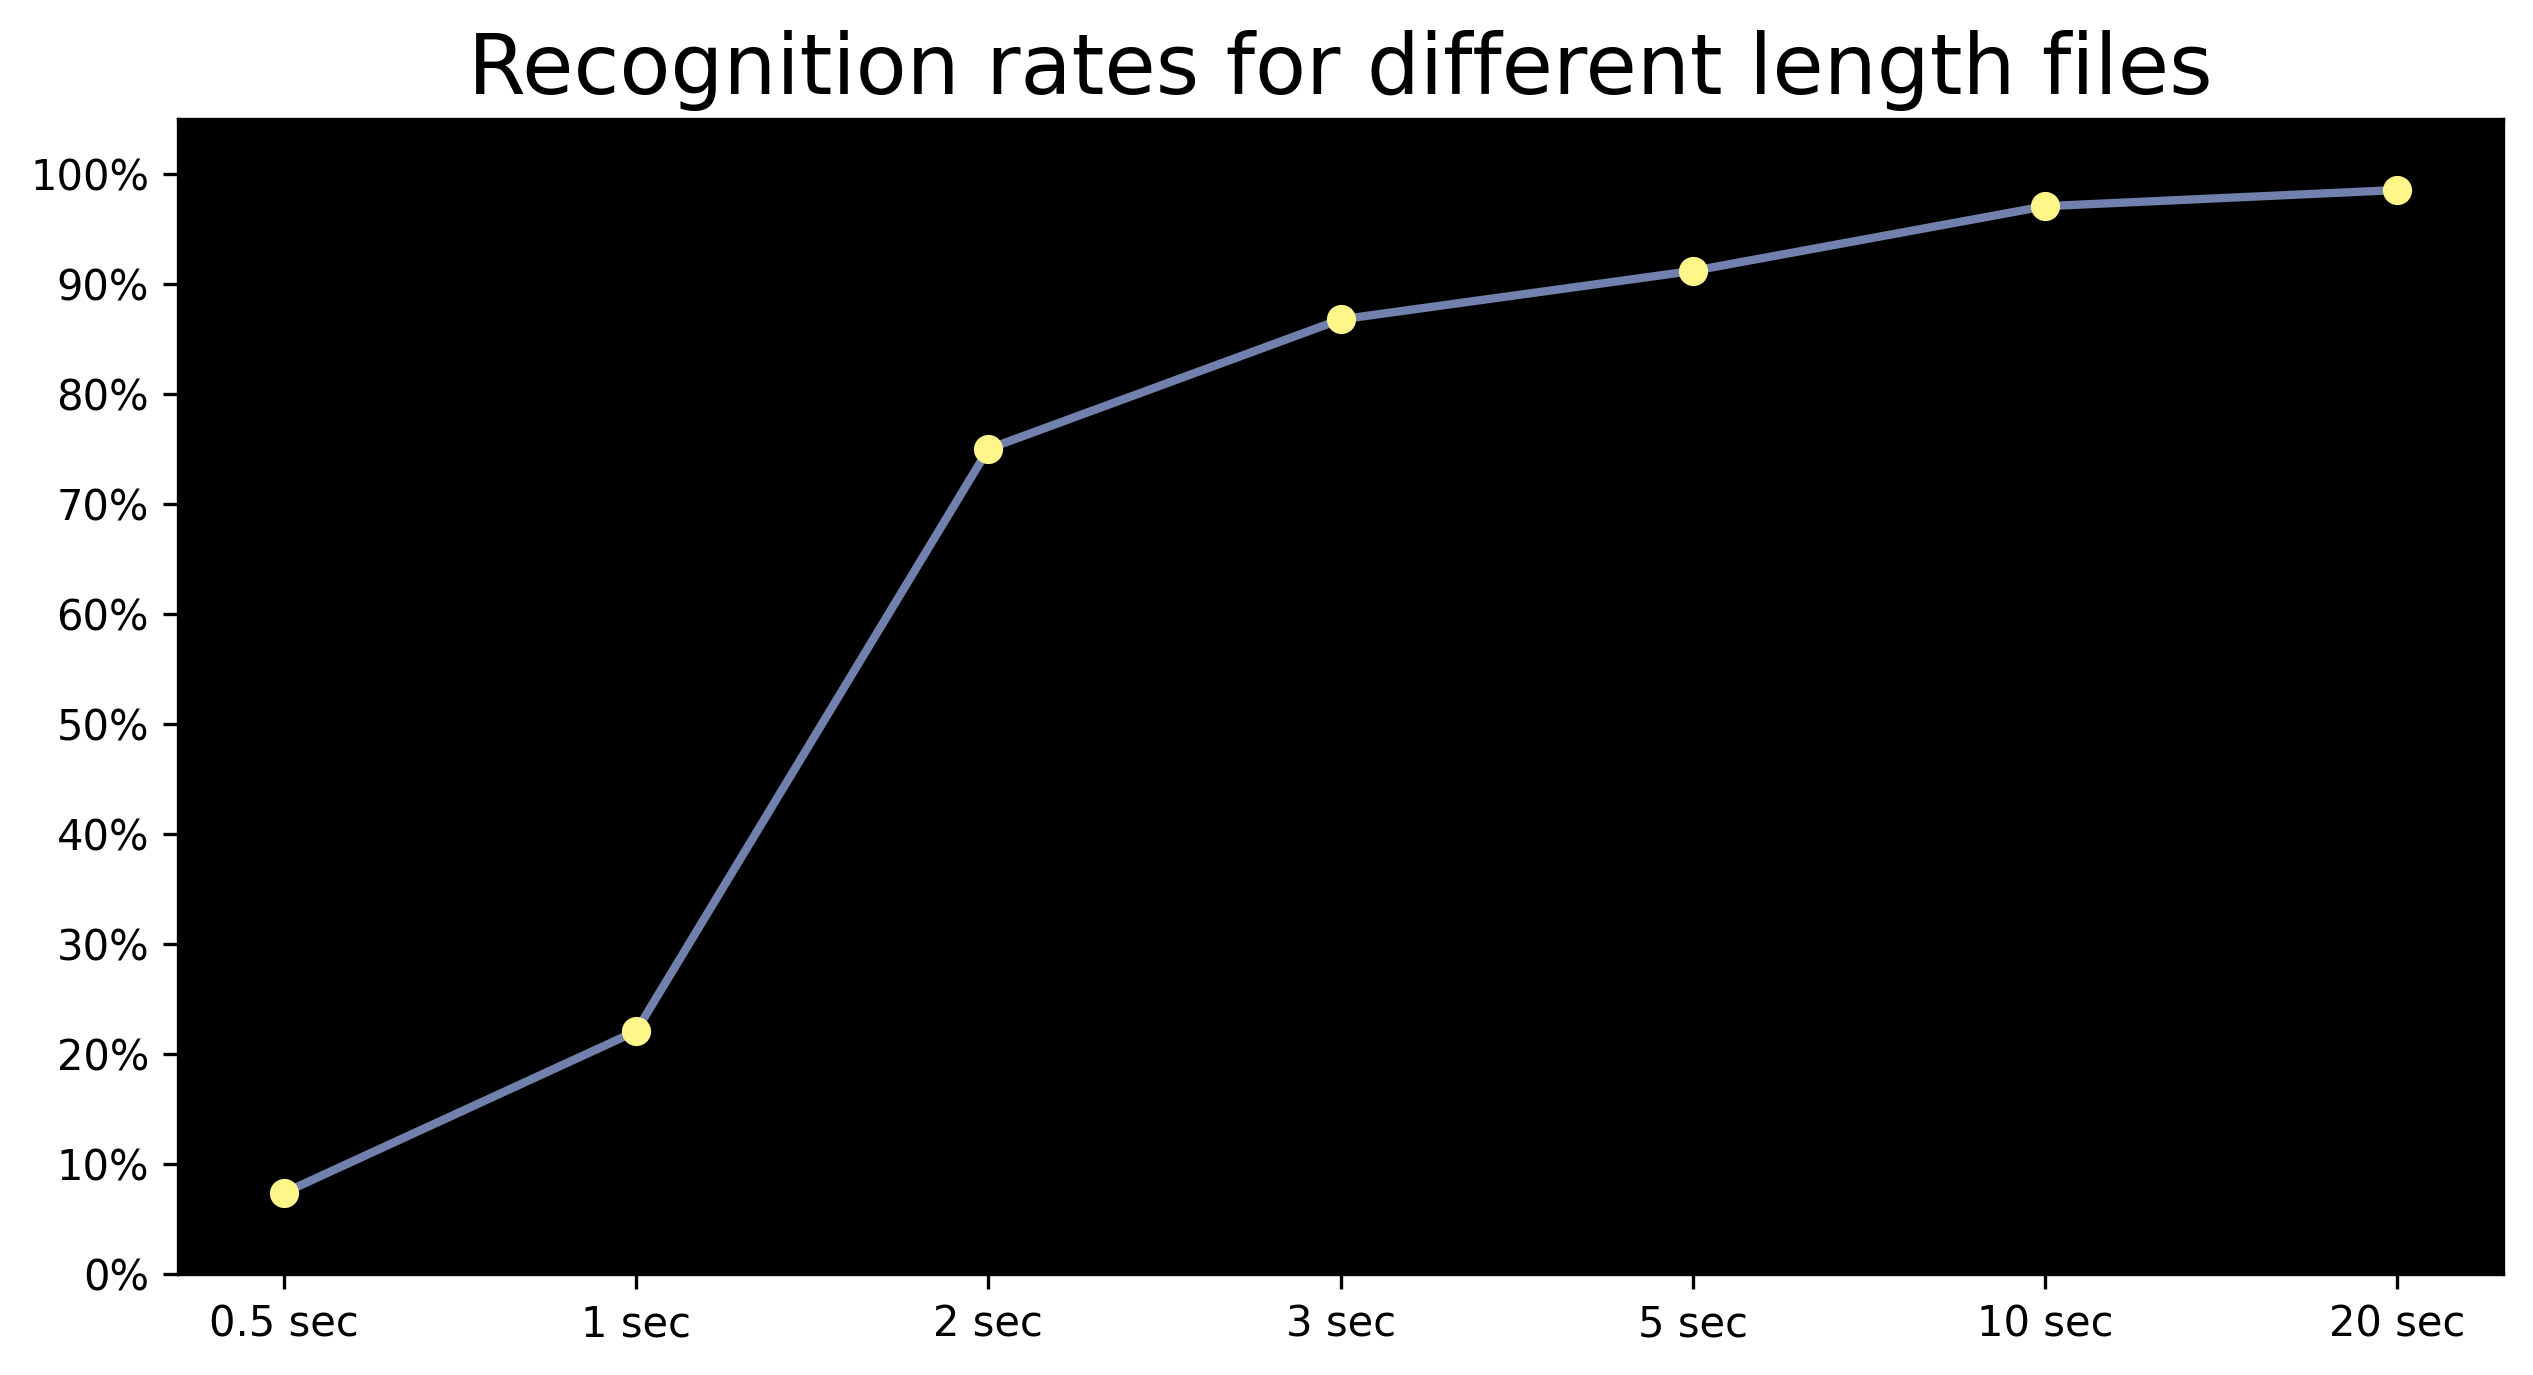

In [40]:
plt.figure(figsize = (10, 5))
plt.title('Recognition rates for different length files', fontsize = 20)
plt.plot(np.array(list_of_scores) / 68 * 100, zorder = 1)
plt.scatter([0, 1, 2, 3, 4, 5, 6], np.array(list_of_scores) / 68 * 100, color = '#FFF689', zorder = 2)
plt.ylim(0, 105)
plt.yticks(labels = [str(x)+'%' for x in np.arange(0, 110, 10)], ticks = np.arange(0, 110, 10))
plt.xticks(labels = ['0.5 sec', '1 sec', '2 sec', '3 sec','5 sec', '10 sec', '20 sec'], ticks = [0, 1, 2, 3, 4, 5, 6])
plt.show()

Overall, the algorithm seems pretty robust when it comes to the length of the registration, achieving recognition rates at 90% or more for 3 seconds registrations and longer. Below this treshold, it starts having some problems when it comes to guessing the right song, having a big drop on average recognition rate for 1 seconds registrations. 

### remove files

In [47]:
f.remove_created_audio_files_end('white_noise')
f.remove_created_audio_files_end('pitch')
f.remove_created_audio_files_end('clipping')
f.remove_short_recordings_end('converted_memo')

----------------------
deleted files in directory white_noise/goosebumps
deleted files in directory white_noise/popstar
deleted files in directory white_noise/tears
----------------------
----------------------
deleted files in directory pitch/goosebumps
deleted files in directory pitch/popstar
deleted files in directory pitch/tears
----------------------
----------------------
deleted files in directory clipping/goosebumps
deleted files in directory clipping/popstar
deleted files in directory clipping/tears
----------------------
Removed files in converted_memo/10_sec
Removed files in converted_memo/5_sec
Removed files in converted_memo/20_sec
Removed files in converted_memo/1_sec
Removed files in converted_memo/3_sec
Removed files in converted_memo/0.5_sec
Removed files in converted_memo/2_sec
